In [1]:
import matplotlib.pyplot as plt
import numpy as np

threshs = np.linspace(.0,1.,20) #need to match the ones specified on experiments.py
colors = {'lower': 'red', 'upper': 'blue', 'evaltest':'green'}

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = .5  # the amount of width reserved for blank space between subplots
hspace = 0.6   # the amount of height reserved for white space between subplots

In [2]:
results = np.load('../results/results_exp3.npy', allow_pickle=True).item()

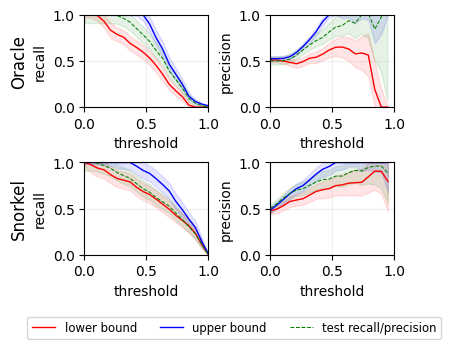

In [4]:
fig, axarr = plt.subplots(2, 2, figsize=(4, 3))
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

# Create handles and labels list for legend
handles, labels = [], []

# Iterate through True/False for rows and target metrics for columns
for i, train_label_model in enumerate([None, 'snorkel']):
    for j, target in enumerate(['recall', 'precision']):
        ax = axarr[i, j]  # Transpose the grid by swapping i and j
        
         
        for bound in ['lower', 'upper']:
            centers = results['bounds'][train_label_model]['centers'][bound][target]
            cis = results['bounds'][train_label_model]['cis'][bound][target]
            line, = ax.plot(threshs, centers, color=colors[bound], lw=1, label=f"{bound} bound")
            ax.fill_between(threshs, np.array(cis)[:,0], np.array(cis)[:,1], color=colors[bound], alpha=.1)
            
        precrec_centers = results['evaltest'][train_label_model]['centers']['lower'][target]
        precrec_cis = results['evaltest'][train_label_model]['cis']['lower'][target]
        precrec_line, = ax.plot(threshs, precrec_centers, '--', color=colors['evaltest'], lw=.75, label="test recall/precision")
        ax.fill_between(threshs, np.array(precrec_cis)[:,0], np.array(precrec_cis)[:,1], color=colors['evaltest'], alpha=.1)
            
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 1)
        ax.set_ylabel(target, size=10)  # Label the y-axis with 'accuracy'
        ax.set_xlabel('threshold', size=10)
        ax.grid(alpha=.2)

        if j == 0:  # Only for the leftmost column
            if train_label_model==None:
                title = "Oracle"
            elif train_label_model=='snorkel':
                title = "Snorkel"
            else:
                title = "FlyingSquid"
            txt = ax.text(-0.6, 0.5, title, va='center', rotation='vertical', transform=ax.transAxes, size=12)  # Label rows with model name
            txt.set_zorder(10)  # This brings the text to the front
        
        #if i == 0:  # Only for the top row
        #    ax.set_title(target, size=12)  # Update the title to use the target metric name

# Collect handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a universal legend outside of the subplots
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize='small', bbox_to_anchor=(0.5, -0.2))

plt.savefig('../plots/experiment3.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()

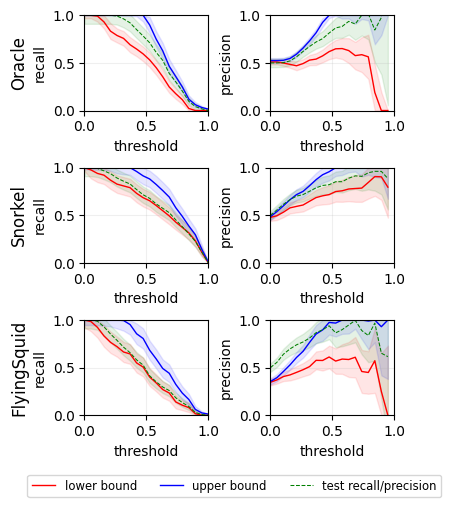

In [5]:
colors = {'lower': 'red', 'upper': 'blue', 'evaltest':'green'}

# Create the transposed 2x2 grid
fig, axarr = plt.subplots(3, 2, figsize=(4, 5))
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)

# Create handles and labels list for legend
handles, labels = [], []

# Iterate through True/False for rows and target metrics for columns
for i, train_label_model in enumerate([None, 'snorkel','fs']):
    for j, target in enumerate(['recall', 'precision']):
        ax = axarr[i, j]  # Transpose the grid by swapping i and j
        
         
        for bound in ['lower', 'upper']:
            centers = results['bounds'][train_label_model]['centers'][bound][target]
            cis = results['bounds'][train_label_model]['cis'][bound][target]
            line, = ax.plot(threshs, centers, color=colors[bound], lw=1, label=f"{bound} bound")
            ax.fill_between(threshs, np.array(cis)[:,0], np.array(cis)[:,1], color=colors[bound], alpha=.1)
            
        precrec_centers = results['evaltest'][train_label_model]['centers']['lower'][target]
        precrec_cis = results['evaltest'][train_label_model]['cis']['lower'][target]
        precrec_line, = ax.plot(threshs, precrec_centers, '--', color=colors['evaltest'], lw=.75, label="test recall/precision")
        ax.fill_between(threshs, np.array(precrec_cis)[:,0], np.array(precrec_cis)[:,1], color=colors['evaltest'], alpha=.1)
            
        ax.set_ylim(0, 1)
        ax.set_xlim(0, 1)
        ax.set_ylabel(target, size=10)  # Label the y-axis with 'accuracy'
        ax.set_xlabel('threshold', size=10)
        ax.grid(alpha=.2)

        if j == 0:  # Only for the leftmost column
            if train_label_model==None:
                title = "Oracle"
            elif train_label_model=='snorkel':
                title = "Snorkel"
            else:
                title = "FlyingSquid"
            txt = ax.text(-0.6, 0.5, title, va='center', rotation='vertical', transform=ax.transAxes, size=12)  # Label rows with model name
            txt.set_zorder(10)  # This brings the text to the front
        
        #if i == 0:  # Only for the top row
        #    ax.set_title(target, size=12)  # Update the title to use the target metric name

# Collect handles and labels
handles, labels = ax.get_legend_handles_labels()

# Create a universal legend outside of the subplots
fig.legend(handles, labels, loc='lower center', ncol=3, fontsize='small', bbox_to_anchor=(0.5, -0.075))

plt.savefig('../plots/experiment3_fs.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()